In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'E:\\Python_Project\\FEDformer_pv'

In [24]:
filepath = 'E:\\Python_Project\\FEDformer_pv\\result_1121_2\\results\\exp1\\'

In [25]:
metrics = np.load(filepath + 'metrics.npy')
pred = np.load(filepath + 'pred.npy')
true = np.load(filepath + 'true.npy')

In [26]:
#print(metrics)   #mae, mse, rmse, mape, mspe
for metric in metrics:
    print(f"{metric:.6f}")

0.219071
0.127240
0.356707
1.867986
940.864380


In [27]:
print(f'Data shape: {pred.shape}')
for i in range(2):
    print(f'Sample {i}:')
    print(pred[i].reshape(96)) 
    print()

Data shape: (1120, 96, 1)
Sample 0:
[-0.85474443 -0.8684526  -0.85532206 -0.8451771  -0.7914156  -0.74604774
 -0.731028   -0.68134993 -0.72422504 -0.6967143  -0.66912174 -0.6237112
 -0.5732733  -0.610541   -0.53853834 -0.42155874 -0.20840064  0.04261687
  0.4495051   0.76126885  1.10348     1.1856347   1.3575927   1.3644713
  1.4410305   1.4724834   1.5108186   1.5627246   1.54462     1.5659153
  1.5421473   1.6264496   1.5574188   1.5124167   1.6178871   1.6350393
  1.7023456   1.7095826   1.643199    1.6476666   1.6562515   1.5894192
  1.5925206   1.5970263   1.6059514   1.5969996   1.5218241   1.4175506
  1.3070377   1.2074794   1.0889952   1.0195901   0.85029376  0.6443
  0.43390244  0.07685304 -0.22570583 -0.5370018  -0.567847   -0.6692021
 -0.6425916  -0.72597915 -0.75404346 -0.7311201  -0.6943163  -0.7029807
 -0.75101006 -0.72246486 -0.7551061  -0.74491656 -0.7484255  -0.7138846
 -0.7462887  -0.7860032  -0.7692908  -0.724839   -0.7958952  -0.753501
 -0.7584133  -0.752071   -0.74

In [28]:
print(f'Data shape: {true.shape}')
for i in range(5):
    print(f'Sample {i}:')
    print(true[i].reshape(96)) 
    print()

Data shape: (1120, 96, 1)
Sample 0:
[-0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984
 -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.74824226 -0.72062397
 -0.6480126  -0.49681067 -0.4208772   0.3247954   0.00299815  0.12601437
  0.15054409  0.5842179   0.91634595  0.8595161   1.2465339   1.1082162
  1.0852587   1.4572922   1.7237428   1.4802357   1.5452718   1.8653117
  1.8449192   1.6530148   1.8884002   2.0000296   1.9586858   2.027696
  1.9479175   0.39346054  0.6648904   0.03712188  1.0060054   0.37398463
  1.4481463  -0.21194299 -0.66069883 -0.28995603  0.13880786  0.73160744
  0.50849915  0.5517239   0.3178284   0.5125544   0.14942938  0.10951123
  0.14909892  0.66265035 -0.32704067 -0.37844318 -0.40810627 -0.6845666
 -0.72445846 -0.8273949  -0.8347984  -0.8347984  -0.8347984  -0.8347984
 -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984
 -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984  -0.8347984
 -0.8347984  -0.8347984 

In [29]:
pred_simplified = np.squeeze(pred)
true_simplified = np.squeeze(true)

pred_first_step = pred_simplified[:, 0]
true_first_step = true_simplified[:, 0]

print(pred_first_step.shape)
print(true_first_step.shape)

(1120,)
(1120,)


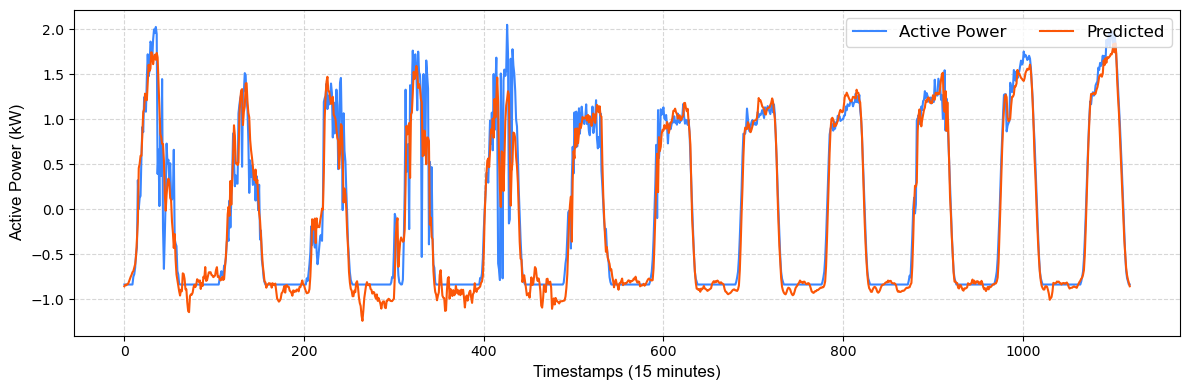

In [30]:
# 绘制 true 和 pred 的对比图
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

plt.figure(figsize=(12, 4))

plt.plot(true_first_step, linewidth=1.5, color='#3a86ff', label='Active Power')
plt.plot(pred_first_step, linewidth=1.5, color='#fb5607', label='Predicted')
plt.legend(prop={'size':12}, ncol=2, loc='upper right')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Timestamps (15 minutes)', size=12, fontdict=font)
plt.ylabel('Active Power (kW)', size=12, fontdict=font)
plt.tight_layout()
#plt.savefig(rootdir + '\\plot_figures\\15_minutes_pred(12x4).png',  bbox_inches = 'tight', pad_inches = .1, dpi=600)
plt.show()


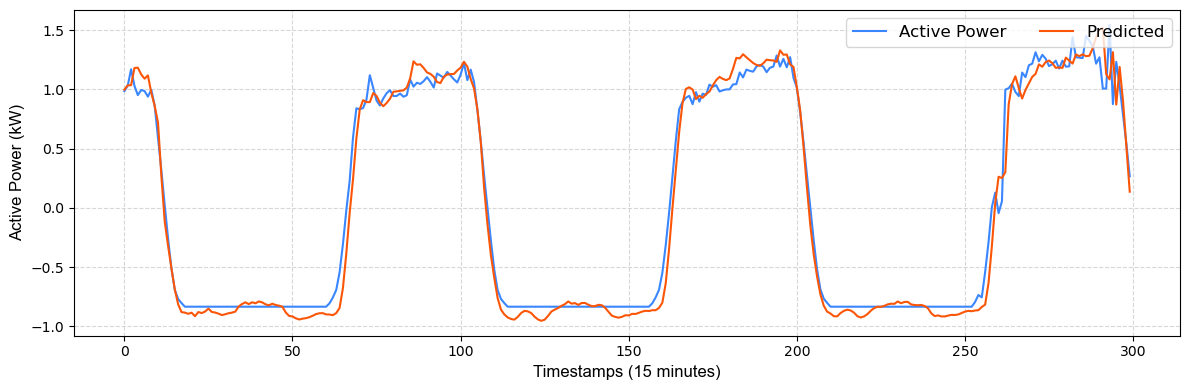

In [36]:
# 只绘制前 100 个点
plt.figure(figsize=(12, 4))

plt.plot(true_first_step[-500:-200], linewidth=1.5, color='#3a86ff', label='Active Power')
plt.plot(pred_first_step[-500:-200], linewidth=1.5, color='#fb5607', label='Predicted')

plt.legend(prop={'size':12}, ncol=2, loc='upper right')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Timestamps (15 minutes)', size=12, fontdict=font)
plt.ylabel('Active Power (kW)', size=12, fontdict=font)
plt.tight_layout()
#plt.savefig(rootdir + '\\plot_figures\\15_minutes_pred(12x4).png',  bbox_inches = 'tight', pad_inches = .1, dpi=600)
plt.show()

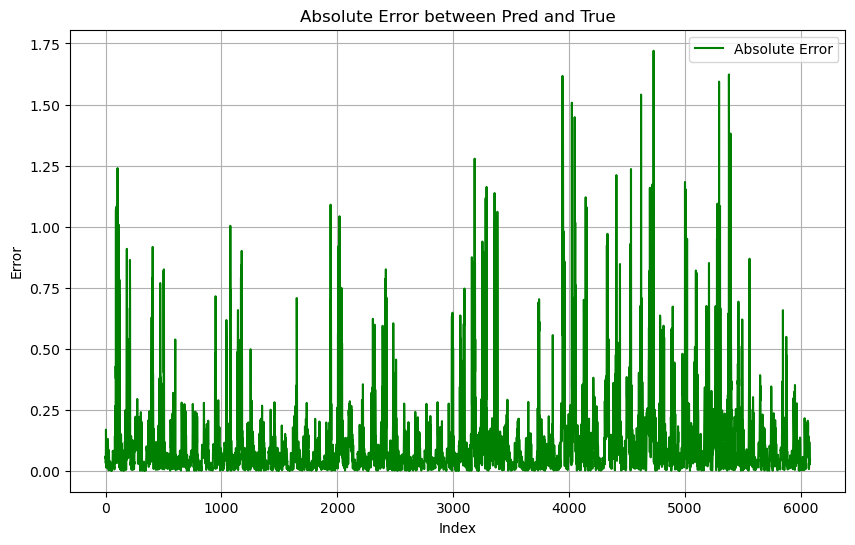

In [23]:
# 计算误差（绝对误差）
error = np.abs(pred_first_step - true_first_step)

# 绘制误差图
plt.figure(figsize=(10, 6))
plt.plot(error, label='Absolute Error', color='g')
plt.title('Absolute Error between Pred and True')
plt.xlabel('Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()
